In [1]:
import io
import numpy as np
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect('tp1.db')
cursor = conn.cursor()

In [3]:
f = io.open('despesas-publicas-tp1.sql', 'r')
sql = f.read()
cursor.executescript(sql)

# 4.1 - Comandos SQL

## Questão 1 

In [5]:
#QUESTOES 4.1 - Comandos SQL
#1 - Liste todos os codigos e nomes de subfuncoes da funcao que possui
#o maior numero de subfuncoes.

print("Questão 1")
questao1 = pd.read_sql_query("SELECT COD_SUBFUNCAO, NOME_SUBFUNCAO "+
                            "FROM DETALHAMENTO_FUNCAO NATURAL JOIN SUBFUNCAO "+
                            "WHERE COD_FUNCAO == (SELECT COD_FUNCAO "+
                            "FROM(SELECT COD_FUNCAO, COUNT(*) AS QNT "+
                            "FROM DETALHAMENTO_FUNCAO NATURAL JOIN SUBFUNCAO "+
                            "GROUP BY COD_FUNCAO "+
                            "ORDER BY QNT DESC) LIMIT 1)", conn)
questao1
#7L, 2C

Questão 1


,COD_SUBFUNCAO,NOME_SUBFUNCAO
0,125,Normatização e fiscalização
1,126,Tecnologia da informação
2,131,Comunicação social
3,244,Assistência comunitária
4,306,Alimentação e nutrição
5,365,Educação infantil
6,511,Saneamento básico rural


## Questão 2

In [6]:
#2 - Liste o valor total de despesas publicas por funcao (nome) e subfuncao (nome), apenas
#nos casos em que esse valor total excedeu 200 mil reais.

print("Questão 2")
questao2 = pd.read_sql_query("SELECT NOME_FUNCAO, NOME_SUBFUNCAO, SUM(VALOR_DESPESA) AS VALOR_TOTAL "+
                            "FROM DESPESA_PUBLICA NATURAL JOIN DETALHAMENTO_FUNCAO NATURAL JOIN FUNCAO NATURAL JOIN SUBFUNCAO "+
                            "GROUP BY NOME_FUNCAO, NOME_SUBFUNCAO "+
                            "HAVING SUM(VALOR_DESPESA) > 200000 ", conn)
questao2
#2L, 3C

Questão 2


,NOME_FUNCAO,NOME_SUBFUNCAO,VALOR_TOTAL
0,Assistência social,Assistência comunitária,227883.77
1,Educação,Educação básica,334262.06


Gráfico da Questão 2:


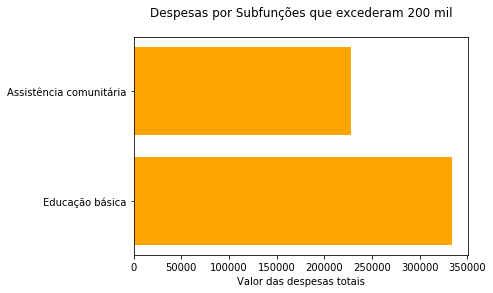

In [7]:
#GRAFICO QUESTAO 2

print("Gráfico da Questão 2:")
fig,ax = plt.subplots()
y_pos = np.arange(len(questao2['NOME_SUBFUNCAO'].tolist()))

ax.barh(y_pos, questao2['VALOR_TOTAL'], align='center',
        color='orange')
ax.set_yticks(y_pos)
ax.set_yticklabels(questao2['NOME_SUBFUNCAO'])
ax.invert_yaxis()
ax.set_xlabel('Valor das despesas totais')
ax.set_title('Despesas por Subfunções que excederam 200 mil\n')
plt.show()

## Questão 5

In [8]:
#5 - Liste o codigo e nome dos programas de governo que possuıram os 3 maiores valores
#de despesas totais na funcao de educacao durante o ano de 2018.

print("Questão 5")
questao5 = pd.read_sql_query("SELECT * "+
                            "FROM (SELECT COD_PROGRAMA_GOVERNO, NOME_PROGRAMA_GOVERNO "+
                            "FROM FUNCAO NATURAL JOIN DETALHAMENTO_FUNCAO NATURAL JOIN DESPESA_PUBLICA NATURAL JOIN PROGRAMA_GOVERNO "+
                            "GROUP BY NOME_FUNCAO, NOME_PROGRAMA_GOVERNO "+
                            "HAVING NOME_FUNCAO == 'Educação' AND ANO_DESPESA = 2018 "+
                            "ORDER BY SUM(VALOR_DESPESA) DESC) LIMIT 3", conn)
questao5
#3L, 2C

Questão 5


,COD_PROGRAMA_GOVERNO,NOME_PROGRAMA_GOVERNO
0,11,ENEM
1,14,PRONATEC
2,35,MAIS MEDICOS


## Questão 6

In [9]:
#6 - Liste todos os nomes de funcoes e subfuncoes das despesas publicas do terceiro trimestre
#de 2018 e seus respectivos valores totais, apenas para o programa MAIS MEDICOS.

print("Questão 6")
questao6 = pd.read_sql_query("SELECT NOME_FUNCAO, NOME_SUBFUNCAO, SUM(VALOR_DESPESA) AS VALOR_TOTAL, NOME_PROGRAMA_GOVERNO "+
                             "FROM FUNCAO NATURAL JOIN DETALHAMENTO_FUNCAO NATURAL JOIN SUBFUNCAO NATURAL JOIN DESPESA_PUBLICA NATURAL JOIN PROGRAMA_GOVERNO "+
                             "WHERE NOME_PROGRAMA_GOVERNO == 'MAIS MEDICOS' AND (MES_DESPESA == 7 OR MES_DESPESA == 8 OR MES_DESPESA == 9) "+
                             "GROUP BY NOME_FUNCAO, NOME_SUBFUNCAO ", conn)
questao6
#4L, 4C

Questão 6


,NOME_FUNCAO,NOME_SUBFUNCAO,VALOR_TOTAL,NOME_PROGRAMA_GOVERNO
0,Defesa nacional,Administração geral,0,MAIS MEDICOS
1,Educação,Assistência hospitalar e ambulatorial,0,MAIS MEDICOS
2,Educação,Ensino superior,2400,MAIS MEDICOS
3,Saúde,Atenção básica,11000,MAIS MEDICOS


Gráfico da Questão 6:


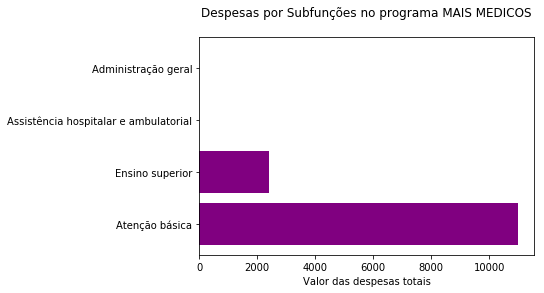

In [10]:
#GRAFICO QUESTAO 6

print("Gráfico da Questão 6:")
fig,ax = plt.subplots()
y_pos = np.arange(len(questao6['NOME_SUBFUNCAO'].tolist()))
ax.barh(y_pos, questao6['VALOR_TOTAL'], align='center',
        color='purple')
ax.set_yticks(y_pos)
ax.set_yticklabels(questao6['NOME_SUBFUNCAO'])
ax.invert_yaxis()
ax.set_xlabel('Valor das despesas totais')
ax.set_title('Despesas por Subfunções no programa MAIS MEDICOS\n')
plt.show()

## Questão 8

In [11]:
#8 - Liste os nomes das subfuncoes das despesas publicas envolvidas para cada programa de
#governo. Sua consulta deve retornar o nome do programa de governo, a subfuncao da
#despesa, a quantidade de entradas de despesas publicas e o valor total dessas despesas

print("Questão 8")
questao8 = pd.read_sql_query("SELECT NOME_PROGRAMA_GOVERNO, NOME_SUBFUNCAO, COUNT(NOME_SUBFUNCAO) AS ENTRADAS_DESPESAS, SUM(VALOR_DESPESA) AS VALOR_TOTAL  "+
                             "FROM SUBFUNCAO NATURAL JOIN DETALHAMENTO_FUNCAO NATURAL JOIN DESPESA_PUBLICA NATURAL JOIN PROGRAMA_GOVERNO "+
                             #Nao compreendi se VALOR_DESPESA = 0 conta, por isso usei o WHERE 
                             "WHERE VALOR_DESPESA > 0 "+ 
                             "GROUP BY NOME_PROGRAMA_GOVERNO, NOME_SUBFUNCAO", conn)
questao8
#10L, 4C

Questão 8


,NOME_PROGRAMA_GOVERNO,NOME_SUBFUNCAO,ENTRADAS_DESPESAS,VALOR_TOTAL
0,BRASIL SEM MISERIA,Alimentação e nutrição,3,100373.55
1,BRASIL SEM MISERIA,Assistência comunitária,2,227883.77
2,BRASIL SEM MISERIA,Tecnologia da informação,1,58918.28
3,CONTROLE DO CANCER,Assistência hospitalar e ambulatorial,1,38971.19
4,ENEM,Educação básica,2,334262.06
5,MAIS MEDICOS,Atenção básica,2,12000.00
6,MAIS MEDICOS,Ensino superior,1,2400.00
7,PRONATEC,Ensino profissional,7,60262.46
8,REDE CEGONHA,Assistência hospitalar e ambulatorial,1,1210.00
9,REGULARIZACAO FUNDIARIA,Ordenamento territorial,1,1497.26


Gráfico da Questão 8:


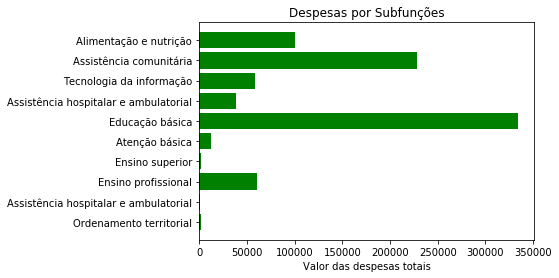

In [12]:
#GRAFICO QUESTAO 8

print("Gráfico da Questão 8:")
fig,ax = plt.subplots()
y_pos = np.arange(len(questao8['NOME_SUBFUNCAO'].tolist()))

ax.barh(y_pos, questao8['VALOR_TOTAL'], align='center',
        color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(questao8['NOME_SUBFUNCAO'])
ax.invert_yaxis()
ax.set_xlabel('Valor das despesas totais')
ax.set_title('Despesas por Subfunções')
plt.show()

## Questão 10

In [13]:
#10 - Liste todas as despesas publicas (codigo da despesa, mes e ano da despesa, modalidade,
#valor) em que o orgao responsavel e aquele que possui o maior valor total em despesas
#durante o ano de 2018.

print("Questão 10")
questao10 = pd.read_sql_query("SELECT COD_DESPESA, MES_DESPESA, ANO_DESPESA, MODALIDADE_DESPESA, VALOR_DESPESA "+
                              "FROM DESPESA_PUBLICA NATURAL JOIN ORGAO "+
                              "WHERE NOME_ORGAO == (SELECT NOME_ORGAO FROM (SELECT NOME_ORGAO, SUM(VALOR_DESPESA) AS VALOR_TOTAL "+
                              "FROM DESPESA_PUBLICA NATURAL JOIN ORGAO "+
                              "GROUP BY NOME_ORGAO "+
                              #Novamente nao ficou claro se VALOR_DESPESA = 0 conta, por isso usei o WHERE
                              "ORDER BY VALOR_TOTAL DESC) LIMIT 1) AND VALOR_DESPESA > 0 ORDER BY MES_DESPESA", conn)
questao10
#2L, 5C

Questão 10


,COD_DESPESA,MES_DESPESA,ANO_DESPESA,MODALIDADE_DESPESA,VALOR_DESPESA
0,835,9,2018,Reserva de Contingência,334126.7
1,858,10,2018,Reserva de Contingência,19250.0


Gráfico da Questão 10:


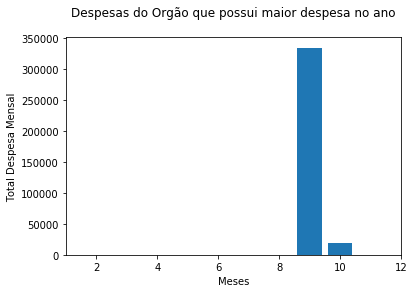

In [14]:
#GRAFICO QUESTAO 10

print('Gráfico da Questão 10:')

plt.bar(questao10['MES_DESPESA'].tolist(), questao10['VALOR_DESPESA'].tolist())

plt.xlim(1, 12)
plt.xlabel("Meses")
plt.ylabel("Total Despesa Mensal")
plt.title('Despesas do Orgão que possui maior despesa no ano\n')
plt.show()

# 4.2 - Tradução de Comandos da Álgebra Relacional

## Questão 12

In [15]:
#ALGEBRA RELACIONAL 4.2 - TRADUÇÃO DE COMANDOS DA ÁLGEBRA RELACIONAL
#12 -

print("Questão 12")
questao12 = pd.read_sql_query("SELECT DISTINCT NOME_FUNCAO, NOME_SUBFUNCAO "+
                             "FROM FUNCAO NATURAL JOIN DETALHAMENTO_FUNCAO NATURAL JOIN SUBFUNCAO", conn)
questao12
#40L, 2C

Questão 12


,NOME_FUNCAO,NOME_SUBFUNCAO
0,Essencial à justiça,Comunicação social
1,Defesa nacional,Administração geral
2,Defesa nacional,Defesa terrestre
3,Segurança pública,Administração geral
4,Segurança pública,Policiamento
5,Segurança pública,Defesa civil
6,Segurança pública,Informação e inteligência
7,Assistência social,Normatização e fiscalização
8,Assistência social,Tecnologia da informação
9,Assistência social,Comunicação social


## Questão 13

In [16]:
#13 - 

print("Questão 13")
questao13 = pd.read_sql_query("SELECT DISTINCT MODALIDADE_DESPESA, VALOR_DESPESA, NOME_PROGRAMA_GOVERNO "+
                             "FROM PROGRAMA_GOVERNO NATURAL JOIN DESPESA_PUBLICA "+
                             "WHERE MODALIDADE_DESPESA == 'Reserva de Contingência'", conn)
questao13
#42L, 3C

Questão 13


,MODALIDADE_DESPESA,VALOR_DESPESA,NOME_PROGRAMA_GOVERNO
0,Reserva de Contingência,0.00,BRASIL SEM MISERIA
1,Reserva de Contingência,0.00,VIOLENCIA NO TRANSITO
2,Reserva de Contingência,0.00,TERRITORIOS DA CIDADANIA
3,Reserva de Contingência,8215.70,BRASIL SEM MISERIA
4,Reserva de Contingência,3.42,BRASIL SEM MISERIA
5,Reserva de Contingência,81120.13,BRASIL SEM MISERIA
6,Reserva de Contingência,0.00,REGULARIZACAO FUNDIARIA
7,Reserva de Contingência,1497.26,REGULARIZACAO FUNDIARIA
8,Reserva de Contingência,0.00,SEGURO RURAL PRIVADO
9,Reserva de Contingência,0.00,VIVER SEM LIMITE


## Questão 14

In [17]:
#14 -

print("Questão 14")
questao14 = pd.read_sql_query("SELECT DISTINCT VALOR_DESPESA, NOME_ORGAO "+
                             "FROM DESPESA_PUBLICA NATURAL JOIN ORGAO "+
                             "WHERE NOME_ORGAO == 'Ministério da Fazenda'", conn)
questao14
#1L, 2C

Questão 14


,VALOR_DESPESA,NOME_ORGAO
0,0,Ministério da Fazenda


## Questão 15

In [18]:
#15 -

print("Questão 15")
questao15 = pd.read_sql_query("SELECT DISTINCT NOME_PROGRAMA_GOVERNO, VALOR_DESPESA "+
                             "FROM DESPESA_PUBLICA NATURAL JOIN ORGAO NATURAL JOIN PROGRAMA_GOVERNO "+
                             "WHERE NOME_ORGAO == 'Ministério da Saúde'", conn)
questao15
#14L, 2C

Questão 15


,NOME_PROGRAMA_GOVERNO,VALOR_DESPESA
0,VIVER SEM LIMITE,0.00
1,SOS EMERGENCIA,0.00
2,MELHOR EM CASA,0.00
3,UBS,0.00
4,"UPA (INVESTIMENTO, CUSTEIO E COMPLEXO DE REGUL...",0.00
5,REDE CEGONHA,0.00
6,CONTROLE DO CANCER,0.00
7,CONTROLE DO CANCER,38971.19
8,"CRACK, E POSSIVEL VENCER",0.00
9,BRASIL SEM MISERIA,0.00


## Fechamento da conexão com o banco

In [19]:
conn.close()